##<font color="lightblue"> Project- Part A: Airbnb Price Prediction and Insights

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load Dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Airbnb_data.csv'
Airbnb_df = pd.read_csv(file_path)




##Deliverables:
###1. DATA EXPLORATION AND PREPROCESSING

In [ ]:
#finding the shape of the dataset
Airbnb_df.shape

(74111, 29)

In [ ]:
#display basic information of the dataset
Airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [ ]:
#statistics summary of the dataset
Airbnb_df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [ ]:
Airbnb_df.isnull().sum()

,0
id,0
log_price,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,200
bed_type,0
cancellation_policy,0
cleaning_fee,0


In [ ]:
#column wise percentage of missing data
(Airbnb_df.isnull().sum()/Airbnb_df.shape[0])*100

,0
id,0.000000
log_price,0.000000
property_type,0.000000
room_type,0.000000
amenities,0.000000
accommodates,0.000000
bathrooms,0.269865
bed_type,0.000000
cancellation_policy,0.000000
cleaning_fee,0.000000


In [ ]:
# Overall Percenatage of missing values from the dataset
(Airbnb_df.isnull().sum().sum()/(Airbnb_df.shape[0]*Airbnb_df.shape[1]))*100


np.float64(3.896950473637167)

In [ ]:
# Object columns having null values
Airbnb_df.select_dtypes(include='object').isnull().columns

Index(['property_type', 'room_type', 'amenities', 'bed_type',
       'cancellation_policy', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'name',
       'neighbourhood', 'thumbnail_url', 'zipcode'],
      dtype='object')

In [ ]:
# Filling null values in object columns
for i in Airbnb_df.select_dtypes(include='object').isnull().columns:
  Airbnb_df[i].fillna(Airbnb_df[i].mode()[0],inplace=True)

In [ ]:
# Filling null values in float64 columns
for i in Airbnb_df.select_dtypes(include='float64').isnull().columns:
  Airbnb_df[i].fillna(Airbnb_df[i].mean(),inplace=True)

In [ ]:
#filling null values in int64 columns
for i in Airbnb_df.select_dtypes(include='int64').isnull().columns:
  Airbnb_df[i].fillna(Airbnb_df[i].mean(),inplace=True)

In [ ]:
Airbnb_df.isnull().sum()

,0
id,0
log_price,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,0
bed_type,0
cancellation_policy,0
cleaning_fee,0


###<font color=lightgreen> Identify trends in listing prices, types, locations, and reviews

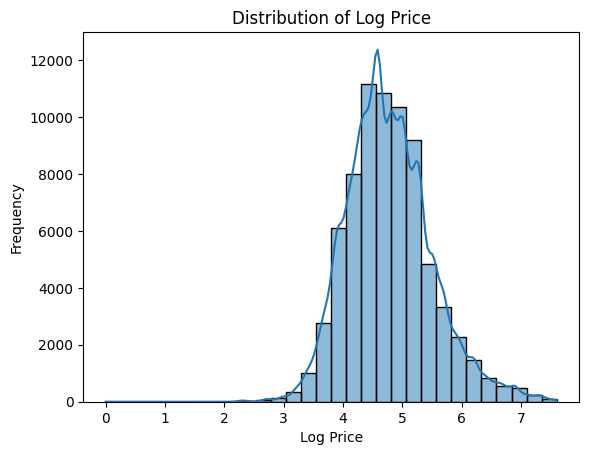

In [ ]:
#Distribution of log price
sns.histplot(Airbnb_df['log_price'], bins=30, kde=True)
plt.title("Distribution of Log Price")
plt.xlabel("Log Price")
plt.ylabel("Frequency")
plt.show()



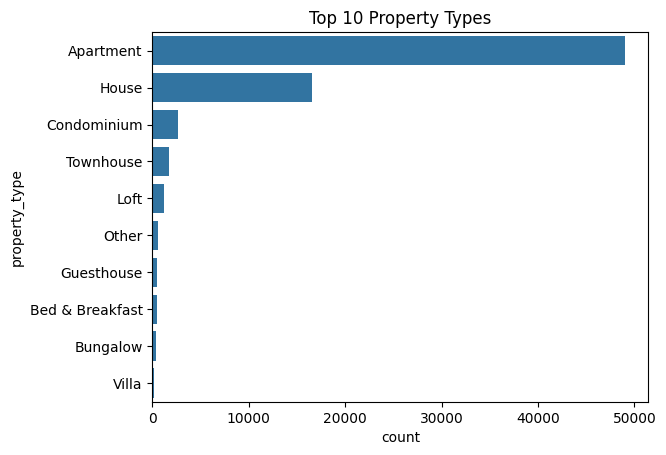

In [ ]:
# Trend: Listings by property_type
sns.countplot(data=Airbnb_df, y='property_type', order=Airbnb_df['property_type'].value_counts().index[:10])
plt.title('Top 10 Property Types')
plt.show()

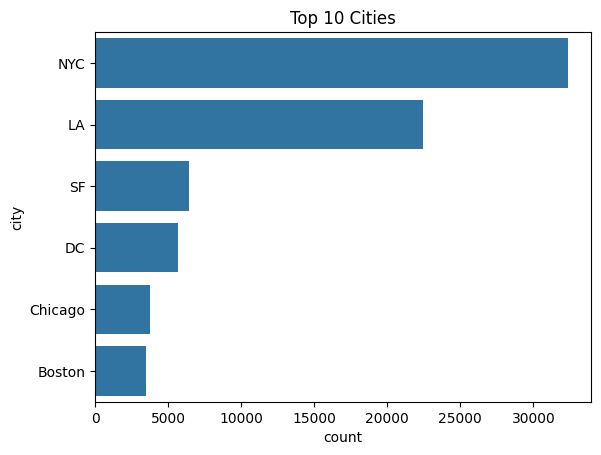

In [ ]:
# Trend: Listings by city
sns.countplot(data=Airbnb_df, y='city', order=Airbnb_df['city'].value_counts().index[:10])
plt.title('Top 10 Cities')
plt.show()

In [ ]:
# Convert log_price to actual price
Airbnb_df['price'] = Airbnb_df['log_price'].apply(lambda x: round(np.exp(x), 2))


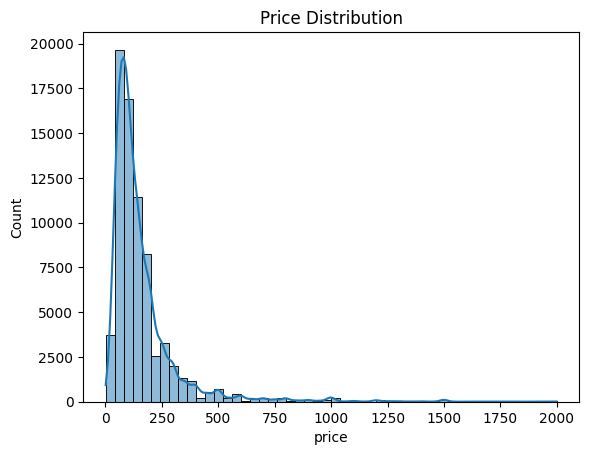

In [ ]:
# Trend: Price distribution
sns.histplot(Airbnb_df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()

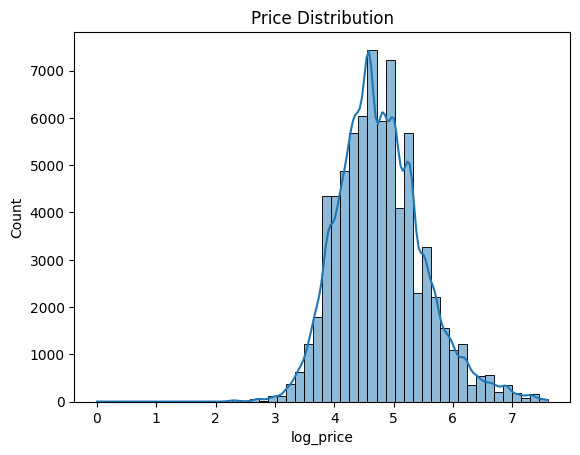

In [ ]:
#Trend:Price distribution using log_price
sns.histplot(Airbnb_df['log_price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()

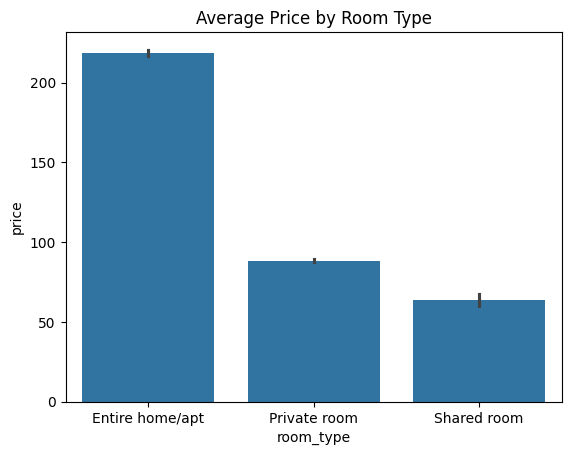

In [ ]:
# Trend: Room type vs average price
sns.barplot(data=Airbnb_df, x='room_type', y='price')
plt.title('Average Price by Room Type')
plt.show()

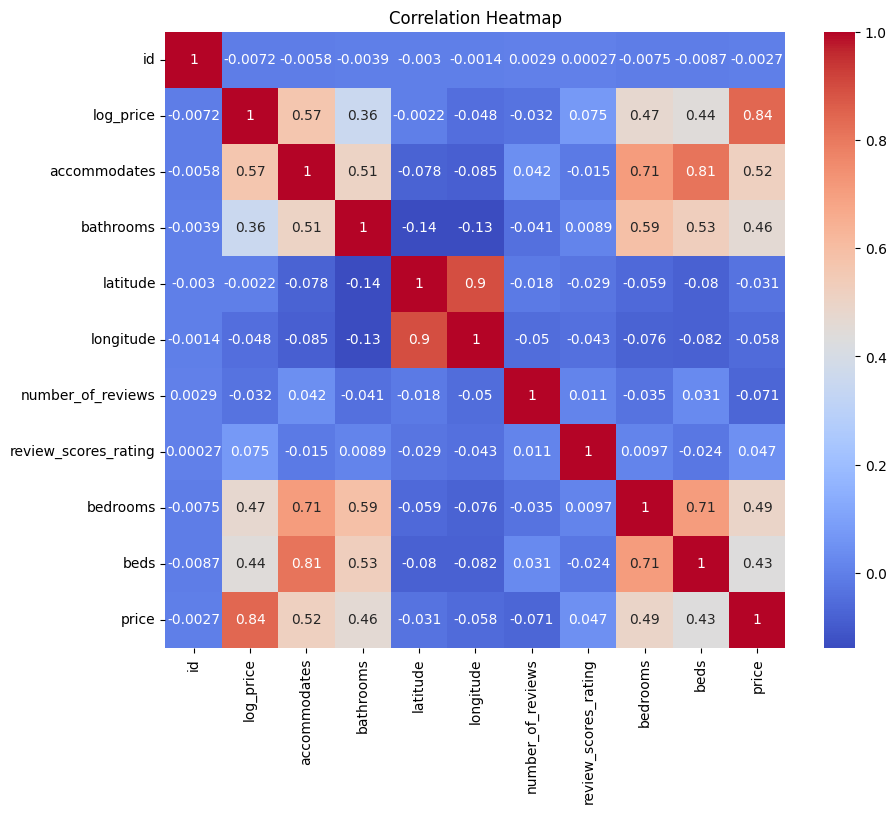

In [ ]:
#Heatmap of correlation
numeric_cols = Airbnb_df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



### <font color=lightgreen> Outlier Detection and Handling

In [ ]:
 # Removes outliers from specified columns using the IQR method.Returns a cleaned DataFrame.
def remove_outliers_iqr(df, columns):

    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean



In [ ]:
#Removing outliers from selected numerical columns
columns_to_check = ['log_price', 'accommodates', 'bathrooms', 'beds', 'review_scores_rating','price']
Airbnb_data= remove_outliers_iqr(Airbnb_df, columns_to_check)

print(f"Original dataset size: {Airbnb_df.shape}")
print(f"Cleaned dataset size: {Airbnb_data.shape}")


Original dataset size: (74111, 30)
Cleaned dataset size: (49789, 30)


###<font color=yellow> #Feature engineering and transformations

In [ ]:
# Converting date columns to actual datetime type
Airbnb_data['host_since'] = pd.to_datetime(Airbnb_data['host_since'])
Airbnb_data['first_review'] = pd.to_datetime(Airbnb_data['first_review'])
Airbnb_data['last_review'] = pd.to_datetime(Airbnb_data['last_review'])

In [ ]:
#Converting boolean style columns to 0 and 1
Airbnb_data['cleaning_fee'] = Airbnb_data['cleaning_fee'].astype(int)
Airbnb_data['instant_bookable'] = Airbnb_data['instant_bookable'].map({'t': 1, 'f': 0})
Airbnb_data['host_has_profile_pic'] = Airbnb_data['host_has_profile_pic'].map({'t': 1, 'f': 0})
Airbnb_data['host_identity_verified'] = Airbnb_data['host_identity_verified'].map({'t': 1, 'f': 0})


In [ ]:
# Host experience in years
Airbnb_data['host_experience_years'] = 2025 -Airbnb_data['host_since'].dt.year
print(Airbnb_data['host_experience_years'].tail())



74105    10
74106    12
74108    13
74109     8
74110    13
Name: host_experience_years, dtype: int32


In [ ]:
# Convert host_response_rate to numeric
Airbnb_data['host_response_rate'] = Airbnb_data['host_response_rate'].str.rstrip('%').astype(float)



In [ ]:
# Count of amenities
Airbnb_data['amenities_count'] = Airbnb_data['amenities'].apply(lambda x: len(str(x).split(',')))

print(Airbnb_data['amenities_count'].tail())

74105    13
74106     1
74108    31
74109    15
74110    18
Name: amenities_count, dtype: int64


In [ ]:
Airbnb_data.shape

(49789, 32)

In [ ]:
#Percentage of data removed
(((Airbnb_df.shape[0]*Airbnb_df.shape[1])-(Airbnb_data.shape[0]*Airbnb_data.shape[1]))/(Airbnb_df.shape[0]*Airbnb_df.shape[1]))*100

28.3395627279801

### MODEL DEVELOPMENT

###<font color=lightgreen>Define the target variable and the predictor variable (Multiple Linear Regression)

In [ ]:
target = 'log_price'
Unnecessary_cols = ['id', 'price', 'name', 'description', 'thumbnail_url', 'log_price']

X = Airbnb_data.drop(columns=Unnecessary_cols)
y = Airbnb_data[target]

# Separating different data types
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()


In [ ]:
# pipeline for numerical feature
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# pipeline for categorical feature
cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combining into a column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])


In [ ]:
# Building a full model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Fitting the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [ ]:
# Evaluation
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred))
mae_log = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse_log:.2f}")
print(f"MAE: {mae_log:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 0.31
MAE: 0.23
R² Score: 0.63


In [ ]:
# Convert log-scale RMSE/MAE to Actual Prices RMSE/MAE
price_error_rmse = np.exp(rmse_log)
price_error_mae = np.exp(mae_log)

print(f"RMSE in actual price scale: ~{(price_error_rmse - 1)*100:.2f}% error")
print(f" MAE in actual price scale: ~{(price_error_mae - 1)*100:.2f}% error")


RMSE in actual price scale: ~35.97% error
 MAE in actual price scale: ~26.48% error


Video Link

https://drive.google.com/file/d/1theR53d0ovtK6980Odmq-CnsronRTwyH/view?usp=sharing